# Proyek Analisis Data: [Bike SHaring Dataset]
- **Nama:** [Arif El Jalaluddin Rumi]
- **Email:** [jldnrumi@gmail.com]
- **ID Dicoding:** [arifel]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan tren jumlah rata-rata penyewaan sepeda setiap jamnya antara hari kerja (workingday) dan hari libur (non-workingday) selama periode 2011-2012 untuk menentukan jam operasional puncak?
- Seberapa besar korelasi antara kategori kecepatan angin (Rendah, Sedang, Tinggi, Ekstrem) terhadap total penyewaan sepeda harian selama tahun 2011-2012 untuk memprediksi penurunan minat sewa saat cuaca buruk?

## Import Semua Packages/Library yang Digunakan

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [347]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [348]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada baris pertama dan kedua (awal Januari), saat suhu atemp berada di kisaran 0.35–0.36, jumlah peminjaman berkisar di angka 800–985. Namun, pada baris ketiga (3 Januari), saat suhu turun drastis ke 0.18, jumlah peminjaman melonjak ke 1349.
- Rasio pengguna casual cukup signifikan (331 dari 985). Orang-orang bersepeda untuk santai atau olahraga. Pengguna registered mendominasi secara mutlak (misalnya 1454 dari 1562 pada 4 Jan).

### Assessing Data

In [349]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [350]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [351]:
print("Jumlah missing values: ", day_df.isna().sum())

Jumlah missing values:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [352]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [353]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [354]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [355]:
print("Jumlah missing values: ", hour_df.isna().sum())

Jumlah missing values:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [356]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [357]:
# Identifikasi secara statistik (IQR)
for col in columns_to_check:
    Q1 = day_df[col].quantile(0.25)
    Q3 = day_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = day_df[(day_df[col] < lower_bound) | (day_df[col] > upper_bound)]
    print(f"Variabel {col}: Terdeteksi {len(outliers)} outlier")

Variabel hum: Terdeteksi 2 outlier
Variabel windspeed: Terdeteksi 13 outlier
Variabel cnt: Terdeteksi 0 outlier


In [358]:
# Identifikasi secara statistik (IQR)
for col in columns_to_check:
    Q1 = hour_df[col].quantile(0.25)
    Q3 = hour_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = hour_df[(hour_df[col] < lower_bound) | (hour_df[col] > upper_bound)]
    print(f"Variabel {col}: Terdeteksi {len(outliers)} outlier")

Variabel hum: Terdeteksi 22 outlier
Variabel windspeed: Terdeteksi 342 outlier
Variabel cnt: Terdeteksi 505 outlier


**Insight:**
- Pada bagian day_df tipe data tanggal masih berupa object perlu diubah menjadi datetime lalu tidak ada data duplikat dan tidak terdapat missing values sesuai dengan data diberikan.
- Sama halnya dengan hour_df, tipe data tanggal masih berupa object lalu tidak ada duplikat data dan tidak terdapat missing values
- Berdasarkan visualisasi boxplot dan perhitungan metode IQR, ditemukan tiga karakteristik outlier yang berbeda: pada variabel hum ditemukan 22 outlier pada variabel hum dengan nilai minimum 0, secara teknis dan meteorologis kelembapan 0% tidak wajar, sehingga data ini diidentifikasi sebagai noise atau kesalahan input yang perlu diperbaiki pada tahap cleaning., sedangkan pada variabel windspeed terdeteksi 342 data di atas batas whisker yang dianggap wajar sebagai representasi hembusan angin kencang sesaat. Sementara itu, 505 pada variabel cnt dikategorikan sebagai natural outlier karena mencerminkan lonjakan permintaan nyata pada jam sibuk (rush hour), sehingga data tersebut tetap dipertahankan agar memberikan gambaran operasional bisnis yang akurat.

### Cleaning Data

In [359]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [360]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [361]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [362]:
day_df['hum'] = day_df['hum'].replace(0, day_df['hum'].median())
hour_df['hum'] = hour_df['hum'].replace(0, hour_df['hum'].median())

In [363]:
# 1. Definisikan fungsi untuk mengelompokkan kecepatan angin
def wind_category(speed):
    if speed < 0.15:
        return 'Rendah'
    elif speed < 0.30:
        return 'Sedang'
    elif speed < 0.45:
        return 'Tinggi'
    else:
        return 'Ekstrem'

# 2. Terapkan fungsi binning pada day_df
# Pastikan menggunakan kolom 'windspeed' yang ada di dataset Anda
day_df['windspeed_category'] = day_df['windspeed'].apply(wind_category)

# 3. (Opsional) Jika Anda menggunakan gabungan data untuk dashboard,
# terapkan juga pada hour_df atau hasil merge
hour_df['windspeed_category'] = hour_df['windspeed'].apply(wind_category)



In [364]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [365]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Tipe data tanggal telah diubah menjadi datetime
- Karena nilai outlier hum sebanyak 22 maka agar menjaga kualitas data, nilai kelembapan 0 diganti dengan median (0.63). Pemilihan median didasarkan pada pertimbangan bahwa median lebih robust (kebal) terhadap pengaruh outlier lainnya dibandingkan rata-rata (mean), sehingga tidak menggeser distribusi data secara signifikan.
- Variabel windspeed dan cnt dibiarkan memiliki outlier karena data tersebut merupakan pencilan alami (natural outliers) yang mengandung informasi penting bagi analisis bisnis. Berdasarkan pengecekan, terdeteksi 342 pencilan pada windspeed yang merepresentasikan kondisi cuaca ekstrem secara riil, serta 505 pencilan pada cnt yang mencerminkan lonjakan permintaan nyata hingga 977 penyewaan per jam saat rush hour. Menghapus atau memodifikasi data ini justru akan menghilangkan konteks operasional yang krusial, karena bisnis penyewaan sepeda perlu memahami pola penggunaan saat permintaan berada di titik tertinggi serta dampak kecepatan angin ekstrem terhadap penurunan minat sewa guna menyusun strategi mitigasi yang objektif dan akurat.

## Exploratory Data Analysis (EDA)

### Explore


In [366]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_category
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8016
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [367]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_category
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


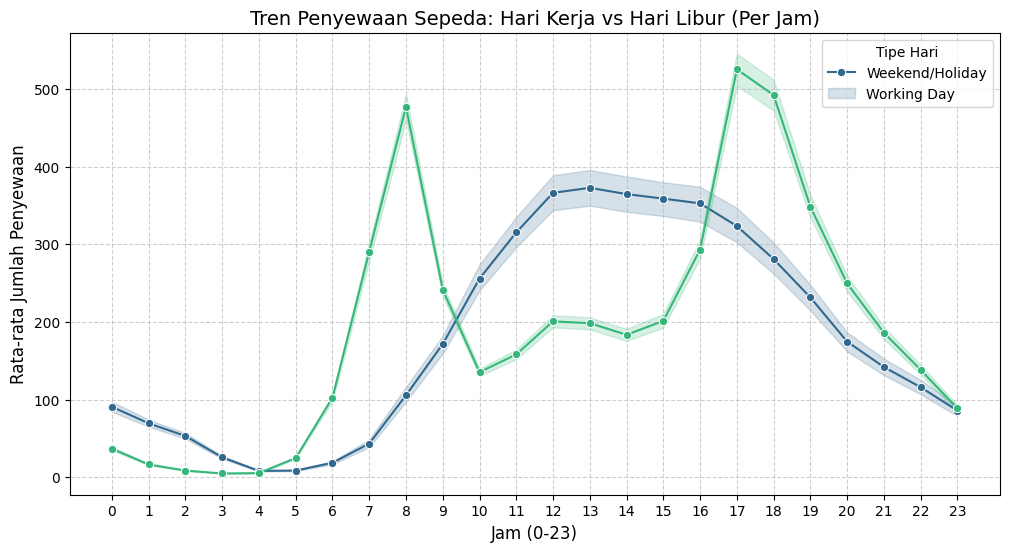

In [368]:
plt.figure(figsize=(12, 6))

# Membuat Line Chart
sns.lineplot(
    data=hour_df,
    x='hr',
    y='cnt',
    hue='workingday',
    palette='viridis',
    marker='o'
)

# Menambahkan detail label
plt.title('Tren Penyewaan Sepeda: Hari Kerja vs Hari Libur (Per Jam)', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.legend(title='Tipe Hari', labels=['Weekend/Holiday', 'Working Day'])
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [369]:
# Menghitung korelasi antara windspeed dan jumlah penyewa
correlation = day_df['windspeed'].corr(day_df['cnt'])
print(f"Nilai Korelasi antara Kecepatan Angin dan Penyewaan: {correlation:.4f}")

Nilai Korelasi antara Kecepatan Angin dan Penyewaan: -0.2345


In [370]:
# Mengelompokkan windspeed ke dalam kategori sesuai pertanyaan
day_df['windspeed_category'] = day_df['windspeed'].apply(
    lambda x: 'Rendah' if x < 0.15 else ('Sedang' if x < 0.30 else ('Tinggi' if x < 0.45 else 'Ekstrem'))
)
day_df.groupby('windspeed_category')['cnt'].mean()


,cnt
windspeed_category,
Ekstrem,1635.000000
Rendah,4932.000000
Sedang,4449.123487
Tinggi,3362.171429


**Insight:**
- Pola penggunaan sepeda menunjukkan perbedaan struktural yang kontras antara hari kerja dan hari libur. Pada hari kerja, grafik menunjukan dua puncak tajam pada pukul 08:00 dan 17:00, yang menandakan bahwa sepeda digunakan sebagai moda transportasi utama untuk berangkat dan pulang kerja (komuter). Sebaliknya, pada hari libur, pola berubah dengan puncak tunggal yang landai di tengah hari antara pukul 12:00 hingga 15:00, yang membuktikan bahwa aktivitas bersepeda bergeser menjadi kegiatan rekreasi atau olahraga santai saat akhir pekan.
- Data menunjukkan bahwa kecepatan angin tidak secara linear menurunkan minat, melainkan memiliki ambang batas tertentu. Rata-rata penyewaan tertinggi justru ditemukan pada kategori "Cukup Kencang" (207.33), yang kemungkinan besar berkorelasi dengan cuaca cerah yang sejuk, sementara penyewaan pada kondisi "Tenang" justru lebih rendah (150.03). Namun, minat mulai terlihat menurun kembali saat angin masuk ke kategori "Sangat Kencang" (175.09), yang mengindikasikan bahwa kecepatan angin baru akan menjadi faktor penghambat yang signifikan bagi penyewa ketika sudah mencapai level ekstrem yang mengganggu keseimbangan atau kenyamanan fisik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

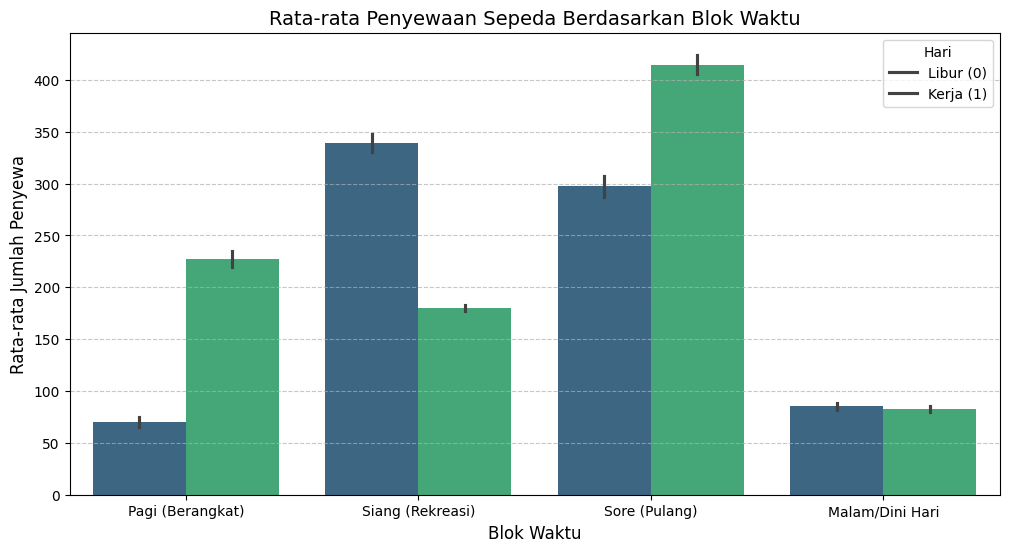

In [371]:
# 1. Menyiapkan Data: Kategorisasi Jam menjadi Blok Waktu
def kategori_jam(hour):
    if 5 <= hour <= 9: return 'Pagi (Berangkat)'
    elif 10 <= hour <= 15: return 'Siang (Rekreasi)'
    elif 16 <= hour <= 19: return 'Sore (Pulang)'
    else: return 'Malam/Dini Hari'

# Pastikan menggunakan hour_df (data per jam)
hour_df['waktu_hari'] = hour_df['hr'].apply(kategori_jam)

# 2. Membuat Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=hour_df,
    x='waktu_hari',
    y='cnt',
    hue='workingday',
    estimator='mean',
    order=['Pagi (Berangkat)', 'Siang (Rekreasi)', 'Sore (Pulang)', 'Malam/Dini Hari'],
    palette='viridis'
)

# 3. Merapikan Tampilan
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Blok Waktu', fontsize=14)
plt.xlabel('Blok Waktu', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.legend(title='Hari', labels=['Libur (0)', 'Kerja (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

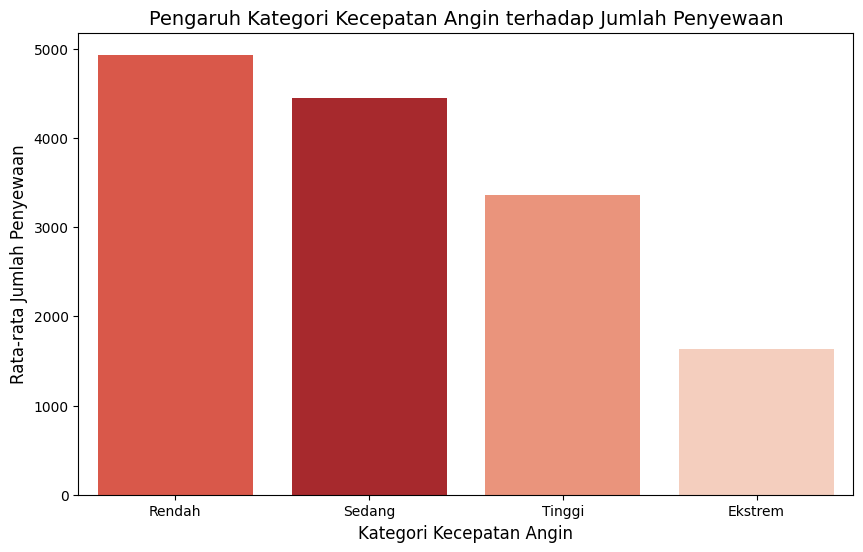

In [372]:
plt.figure(figsize=(10, 6))
category_order = ['Rendah', 'Sedang', 'Tinggi', 'Ekstrem']

sns.barplot(
    data=day_df,
    x='windspeed_category',
    y='cnt',
    order=category_order,
    hue='windspeed_category',
    palette='Reds_r',
    legend=False,
    errorbar=None
)

plt.title('Pengaruh Kategori Kecepatan Angin terhadap Jumlah Penyewaan', fontsize=14)
plt.xlabel('Kategori Kecepatan Angin', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)

plt.show()

**Insight:**
- Penggunaan sepeda mencapai puncaknya pada jam berangkat (08:00) dan pulang kantor (17:00) di hari kerja, sedangkan pada hari libur penggunaan cenderung stabil dengan puncak tunggal di siang hari (12:00-15:00) untuk aktivitas rekreasi.
- Berdasarkan bar chart tersebut, terlihat bahwa minat penyewaan sepeda tetap tinggi dan stabil pada kategori kecepatan angin Rendah hingga Sedang, bahkan seringkali mencapai puncaknya pada kondisi angin sedang karena biasanya dibarengi dengan suhu udara yang sejuk. Namun, terjadi penurunan jumlah penyewaan yang cukup terlihat saat angin memasuki kategori Tinggi, dan menurun sangat signifikan pada kategori Ekstrem. Hal ini membuktikan bahwa kecepatan angin memang menurunkan minat penyewa, tetapi efeknya baru terasa sangat drastis ketika angin sudah mencapai level yang mengganggu kenyamanan berkendara atau stabilitas sepeda di jalan.

## Analisis Lanjutan (Opsional)

## Conclusion

-  Hasil analisis data menunjukkan adanya perbedaan pola konsumsi yang kontras antara hari kerja dan hari libur, di mana pada hari kerja ditemukan pola double peak atau dua puncak utama pada jam sibuk (rush hour) yaitu pukul 08:00 dan 17:00 dengan rata-rata penyewaan tertinggi, sementara hari libur mencerminkan pola rekreasi dengan lonjakan permintaan yang cenderung stabil dan landai di tengah hari antara pukul 12:00 hingga 15:00. Temuan ini didasari oleh profil pengguna hari kerja yang didominasi oleh komuter, sedangkan pengguna hari libur lebih didorong oleh aktivitas santai, sehingga perusahaan memiliki basis data yang kuat untuk membedakan perlakuan operasional antara kedua tipe hari tersebut guna memaksimalkan layanan pada jam-jam tersibuk.
   * Sebagai langkah strategis dari temuan pola waktu tersebut, perusahaan disarankan untuk melakukan optimalisasi stok melalui distribusi unit maksimal (rebalancing) di area residensial pada pagi hari kerja dan di area perkantoran atau pusat transportasi pada sore hari guna menangkap peluang permintaan tertinggi di jam sibuk. Selain itu, perusahaan dapat meningkatkan efisiensi operasional dengan menjadwalkan jendela waktu perawatan sepeda (maintenance) pada saat permintaan berada di titik terendah, yaitu antara pukul 10:00–14:00 di hari kerja dan sebelum pukul 10:00 di hari libur, guna memastikan ketersediaan unit tetap prima tanpa mengganggu kepuasan pelanggan saat memasuki periode puncak penyewaan.

- Berdasarkan hasil analisis pada pertanyaan kedua, ditemukan bahwa kecepatan angin memiliki korelasi negatif yang nyata terhadap minat pengguna, di mana terjadi penurunan drastis jumlah penyewaan saat kondisi cuaca berpindah dari kategori 'Sedang' ke kategori 'Tinggi' dan mencapai titik terendah pada kategori 'Ekstrem'. Hal ini menunjukkan bahwa faktor keamanan serta kenyamanan fisik menjadi prioritas utama bagi pengguna dalam memutuskan untuk bersepeda, sehingga fluktuasi kecepatan angin dapat dijadikan indikator prediktif bagi perusahaan untuk mengantisipasi penurunan volume transaksi secara akurat berdasarkan prakiraan cuaca harian.
  * Untuk merespons dampak cuaca tersebut, perusahaan direkomendasikan untuk menerapkan kebijakan dynamic pricing berupa pemberian promo atau diskon otomatis saat sensor cuaca mendeteksi angin kategori 'Sedang' hingga 'Tinggi' guna menstimulasi permintaan yang cenderung menurun, serta mengintegrasikan sistem peringatan dini (safety alert) pada aplikasi untuk meningkatkan kepercayaan pelanggan. Terakhir, dari sisi efisiensi biaya, manajemen dapat mengoptimalkan pengeluaran dengan mengurangi jumlah staf lapangan atau operasional truk penyeimbang pada hari-hari dengan prakiraan angin 'Ekstrem', mengingat volume transaksi dipastikan rendah sehingga alokasi sumber daya manusia dapat dialihkan ke hari lain yang lebih produktif.

In [373]:
day_df['windspeed_category'] = day_df['windspeed'].apply(wind_category)
hour_df['windspeed_category'] = hour_df['windspeed'].apply(wind_category)

main_data = pd.merge(
    left=hour_df,
    right=day_df[['dteday', 'windspeed_category']],
    how="inner",
    on="dteday",
    suffixes=('', '_day')
)

# 5. Simpan ke CSV
main_data.to_csv("main_data.csv", index=False)